<a href="https://colab.research.google.com/github/ifrah9/CodeClauseInternship_creditcardfrauddetection/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
from imblearn.over_sampling import SMOTE


In [ ]:
df = pd.read_csv('/content/creditcard.csv')

In [ ]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [ ]:
results = {}
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.84      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

[[56854    10]
 [   16    82]]


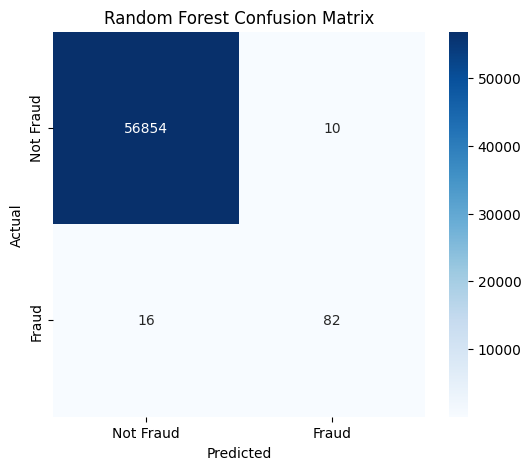

In [ ]:
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Report': classification_report(y_test, y_pred_rf, output_dict=True),
    'Predictions': y_pred_rf
}
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

In [ ]:
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classifier Performance:")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.87      0.84        98

    accuracy                           1.00     56962
   macro avg       0.90      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962

[[56844    20]
 [   13    85]]


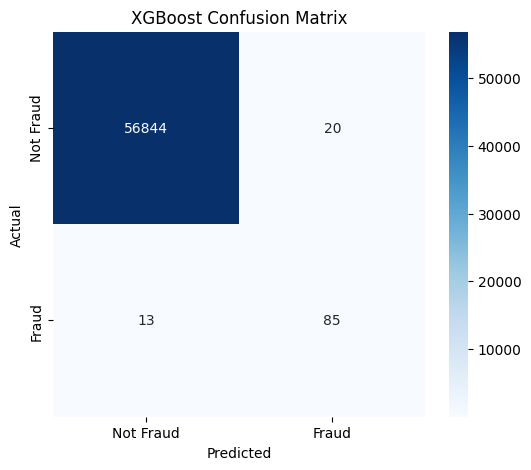

In [ ]:
results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Report': classification_report(y_test, y_pred_xgb, output_dict=True),
    'Predictions': y_pred_xgb
}
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost Confusion Matrix")


In [ ]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_smote, y_train_smote)  # Using balanced data
y_pred_lgb = lgb_model.predict(X_test)
print("LightGBM Classifier Performance:")
print(classification_report(y_test, y_pred_lgb))
print(confusion_matrix(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.159916 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.54      0.86      0.66        98

    accuracy                           1.00     56962
   macro avg       0.77      0.93      0.83     56962
weighted avg       1.00      1.00      1.00     56962

[[56793    71]
 [   14    84]]


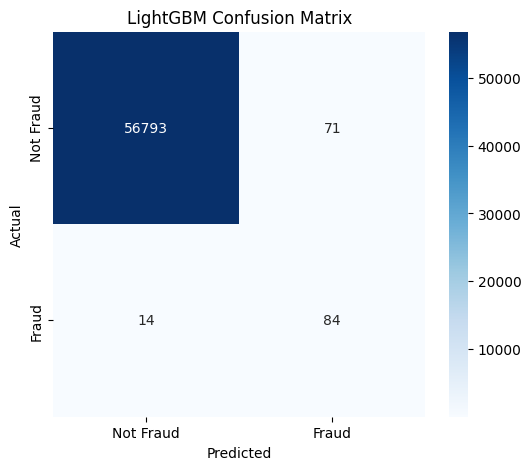

In [ ]:

results['LightGBM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lgb),
    'Report': classification_report(y_test, y_pred_lgb, output_dict=True),
    'Predictions': y_pred_lgb
}
plot_confusion_matrix(y_test, y_pred_lgb, "LightGBM Confusion Matrix")


In [ ]:
metrics_df = pd.DataFrame({
    model: {
        'Precision': results[model]['Report']['1']['precision'],
        'Recall': results[model]['Report']['1']['recall'],
        'F1-Score': results[model]['Report']['1']['f1-score'],
        'Accuracy': results[model]['Accuracy']
    }
    for model in results.keys()
}).T


<Figure size 800x600 with 0 Axes>

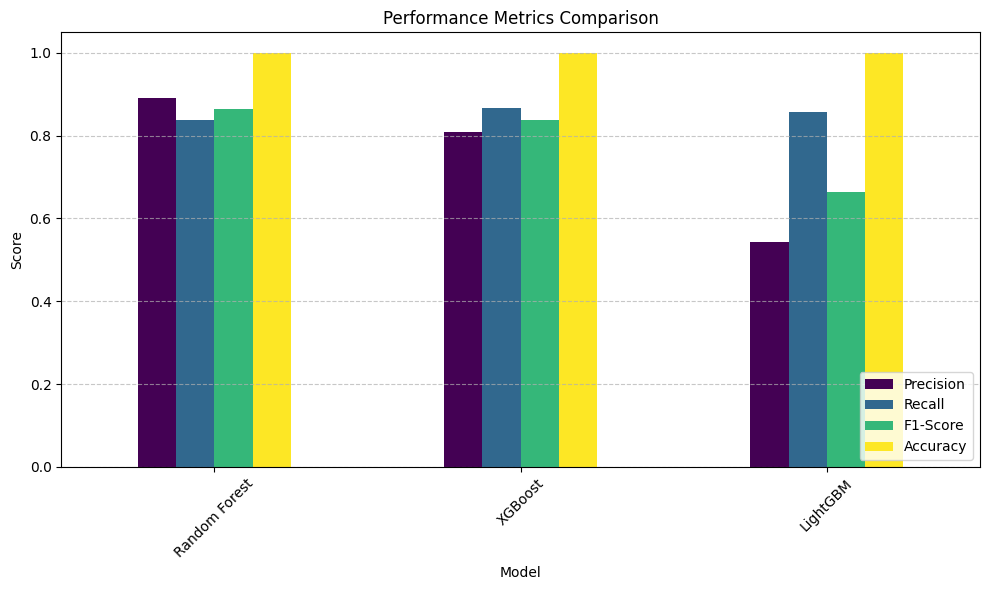

In [ ]:
plt.figure(figsize=(8, 6))
metrics_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Performance Metrics Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
print("Model Performance Metrics:")
print(metrics_df)


Model Performance Metrics:
               Precision    Recall  F1-Score  Accuracy
Random Forest   0.891304  0.836735  0.863158  0.999544
XGBoost         0.809524  0.867347  0.837438  0.999421
LightGBM        0.541935  0.857143  0.664032  0.998508
